In [1]:
import pandas as pd
import numpy as np

In [2]:
df= pd.read_csv('winequalityN.csv')

In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [4]:
df.shape

(6497, 13)

In [5]:
df.head(2)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [6]:
df.iloc[0:2]

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6


In [7]:
df.tail(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [8]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [9]:
print("wine mean = ",df["quality"].mean())


wine mean =  5.818377712790519


In [10]:
non_zero_df = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
for column in non_zero_df:
    df[column] = df[column].replace(0, np.NaN)
    mean = int(df[column].mean(skipna = True))
    df[column] = df[column].replace(np.NaN, mean)

    
    


In [11]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
df.groupby('type')['quality'].describe().fillna(0)

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
red,1599.0,5.636023,0.807569,3.0,5.0,6.0,6.0,8.0
white,4898.0,5.877909,0.885639,3.0,5.0,6.0,6.0,9.0


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,5)



Text(0.5, 1.0, '"Average Quality by Wine Color"')

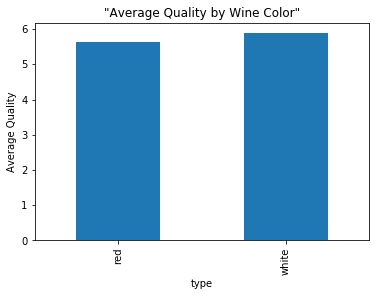

In [14]:
df.groupby('type')['quality'].mean().dropna().plot(kind='bar') #plotting mean engine capacity by fuel type
plt.ylabel('Average Quality')
plt.title('"Average Quality by Wine Color"')


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [17]:
df.fillna(0)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
5,white,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
6,white,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
7,white,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
8,white,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
9,white,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6


Text(0.5, 1.0, 'rating by wine type')

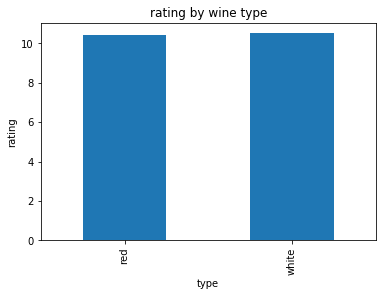

In [18]:
df.groupby('type')['alcohol'].mean().dropna().plot(kind='bar') 
plt.ylabel('rating')
plt.title('rating by wine type')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1176adeb8>,
      dtype=object)

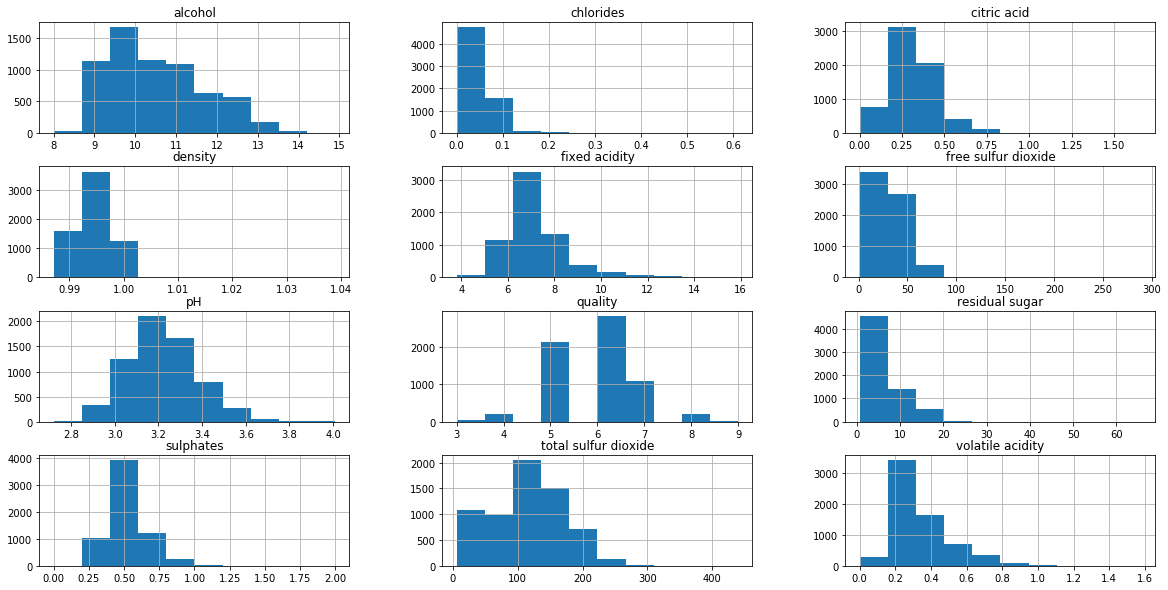

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
df.hist()

In [20]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216246,0.339273,0.318575,5.444190,0.056024,30.525319,115.744574,0.994697,3.218093,0.530888,10.491801,5.818378
std,1.295779,0.164978,0.145393,4.757399,0.035044,17.749400,56.521855,0.002999,0.160842,0.149351,1.192712,0.873255
min,3.800000,0.000000,0.000000,0.600000,0.000000,1.000000,6.000000,0.987110,2.720000,0.000000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


In [27]:
reg_sample_df = df.sample(frac=0.1, random_state=17)
from sklearn.linear_model import LinearRegression
pd.set_option('precision', 4)
pd.set_option('max_columns', 9)
pd.set_option('display.width', None)


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=2)
sns.set_style('whitegrid')

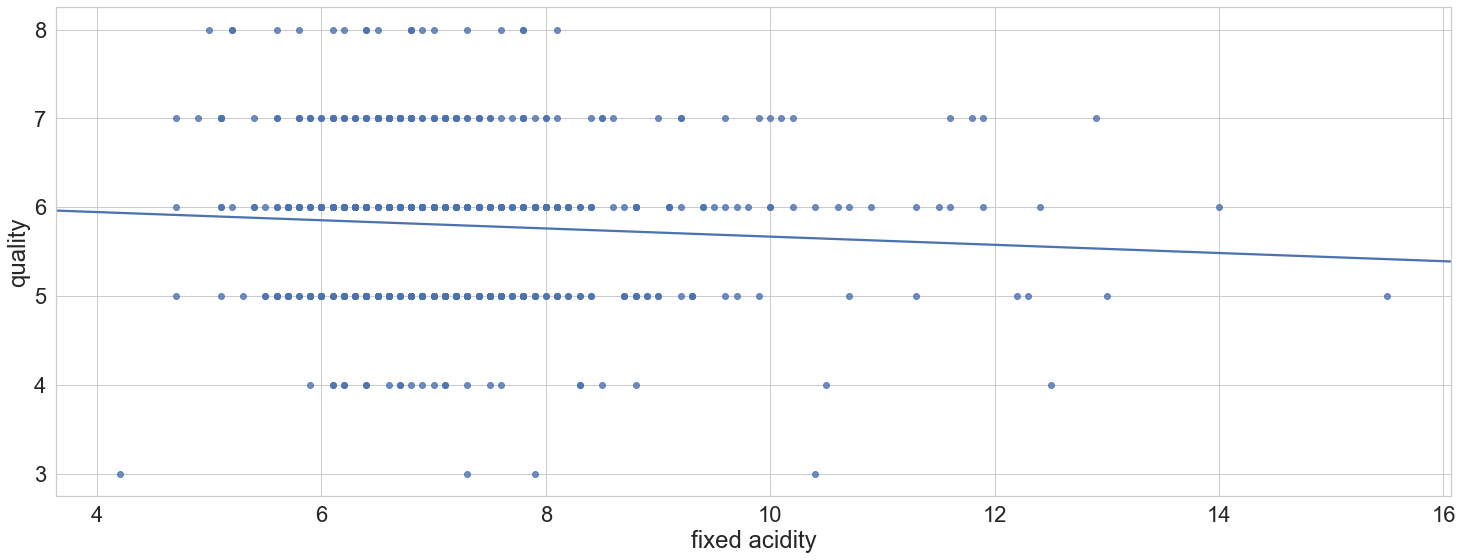

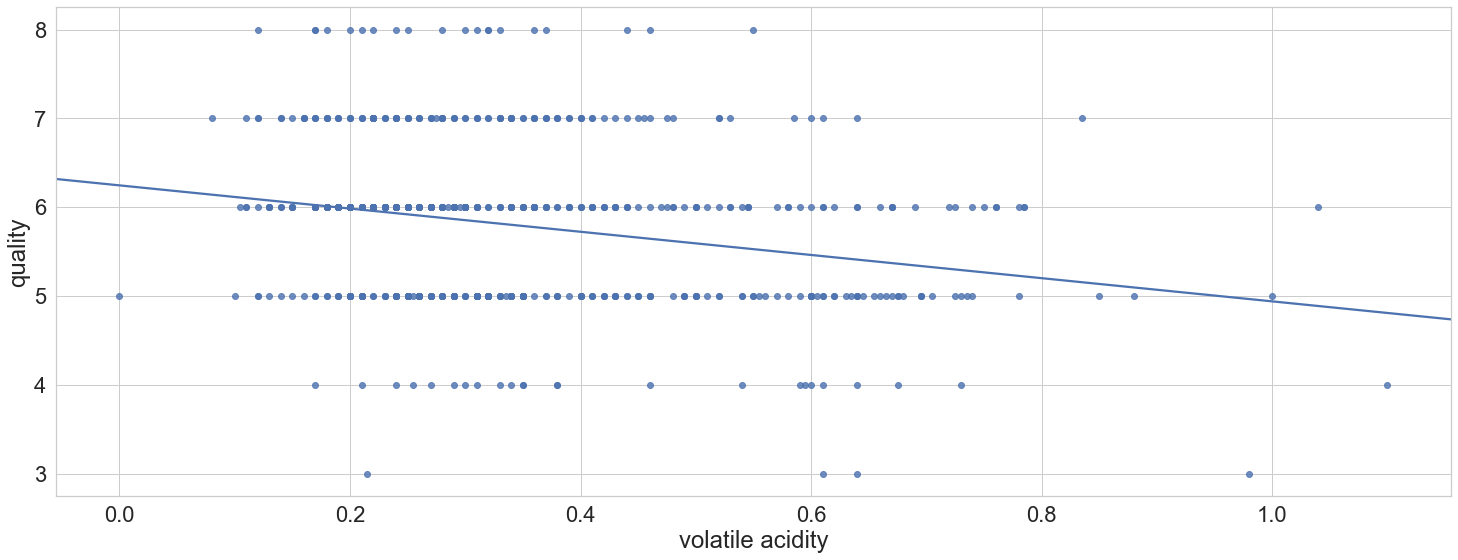

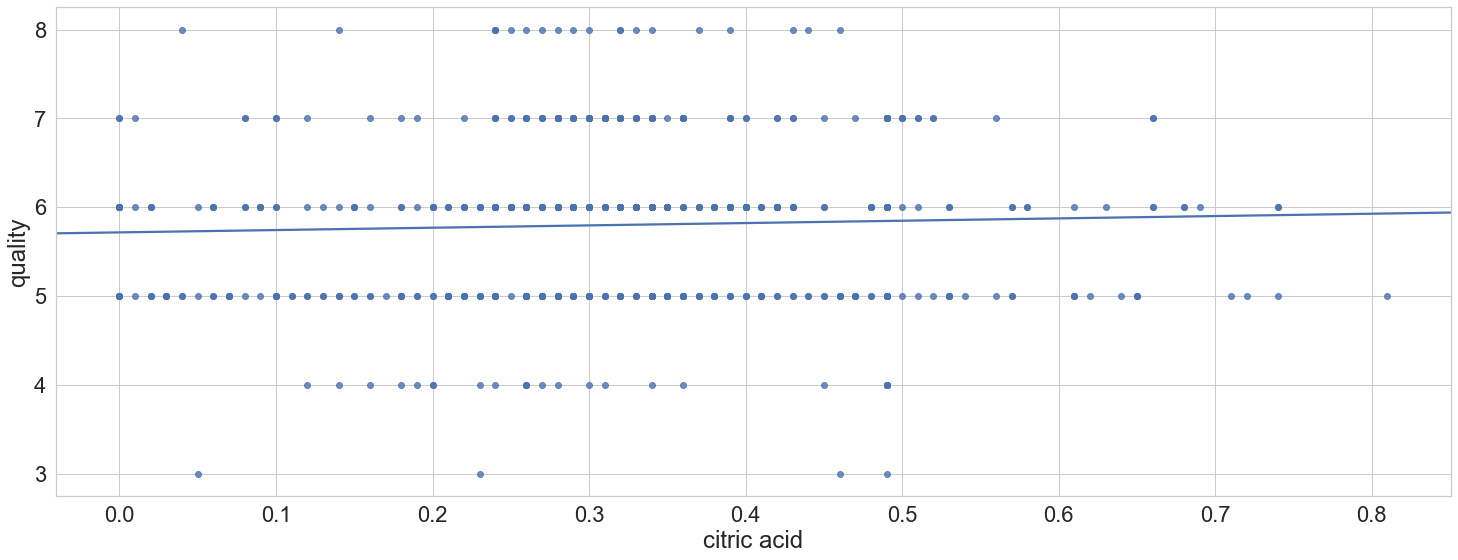

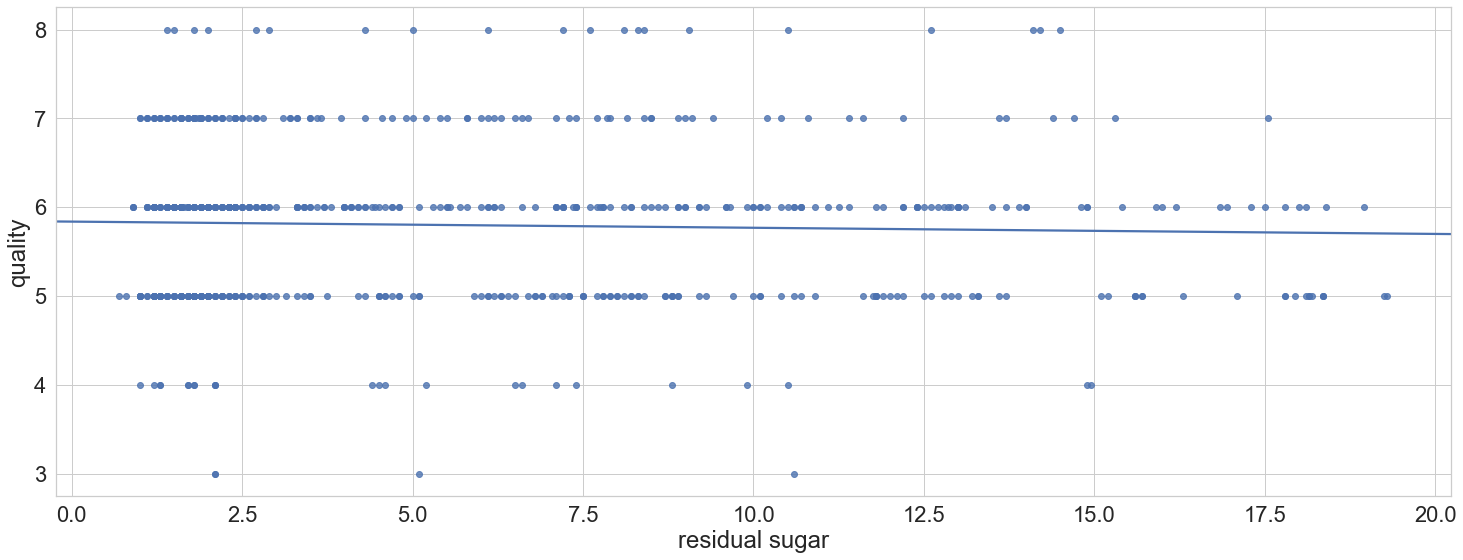

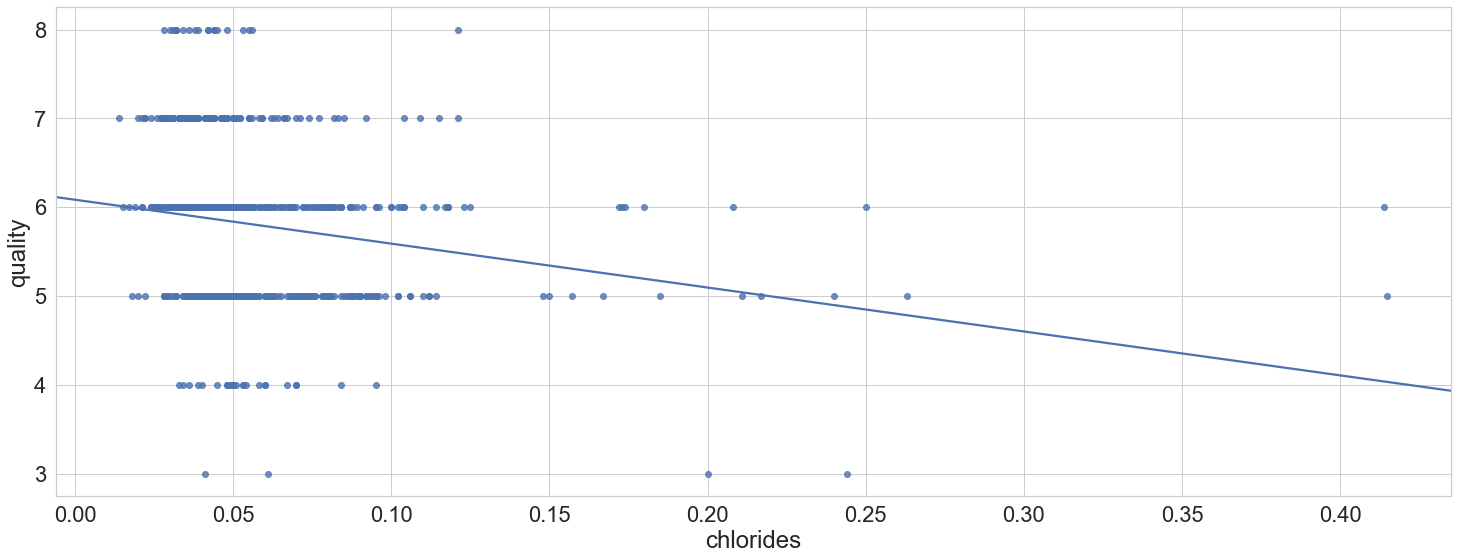

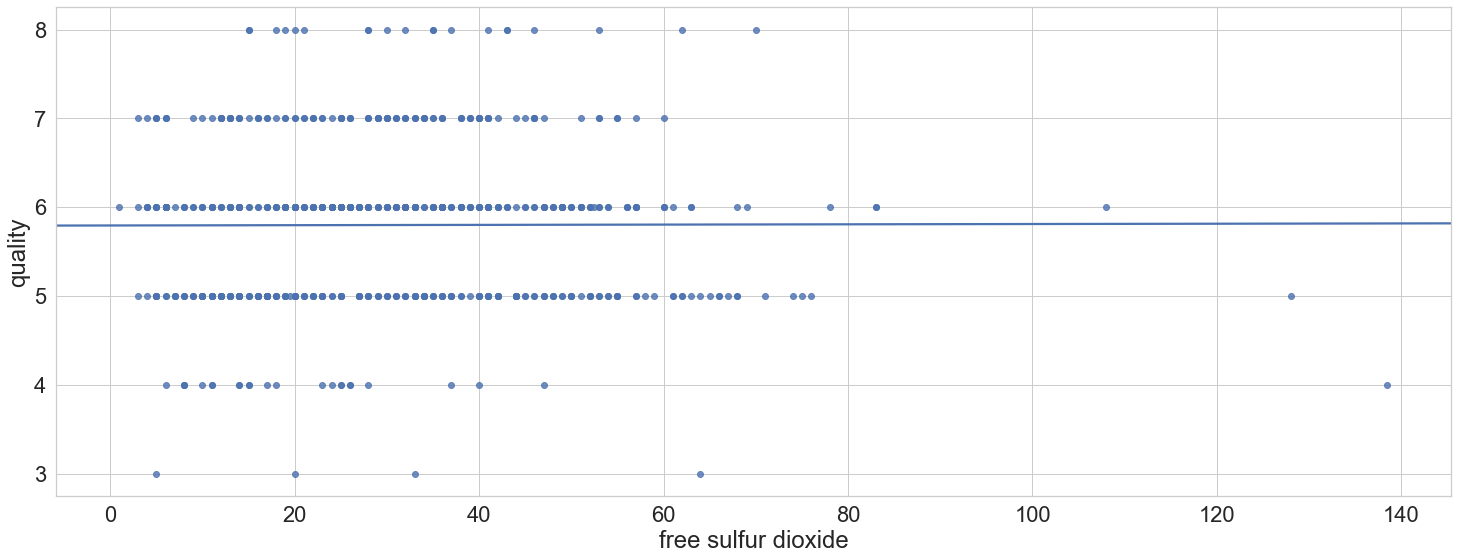

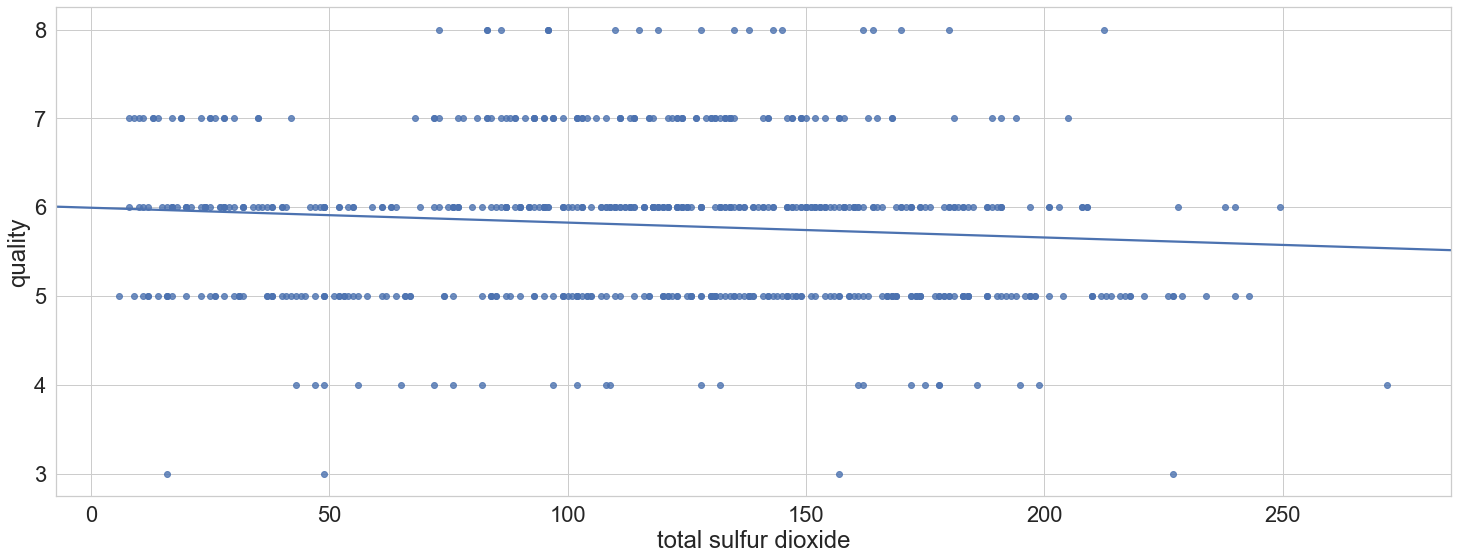

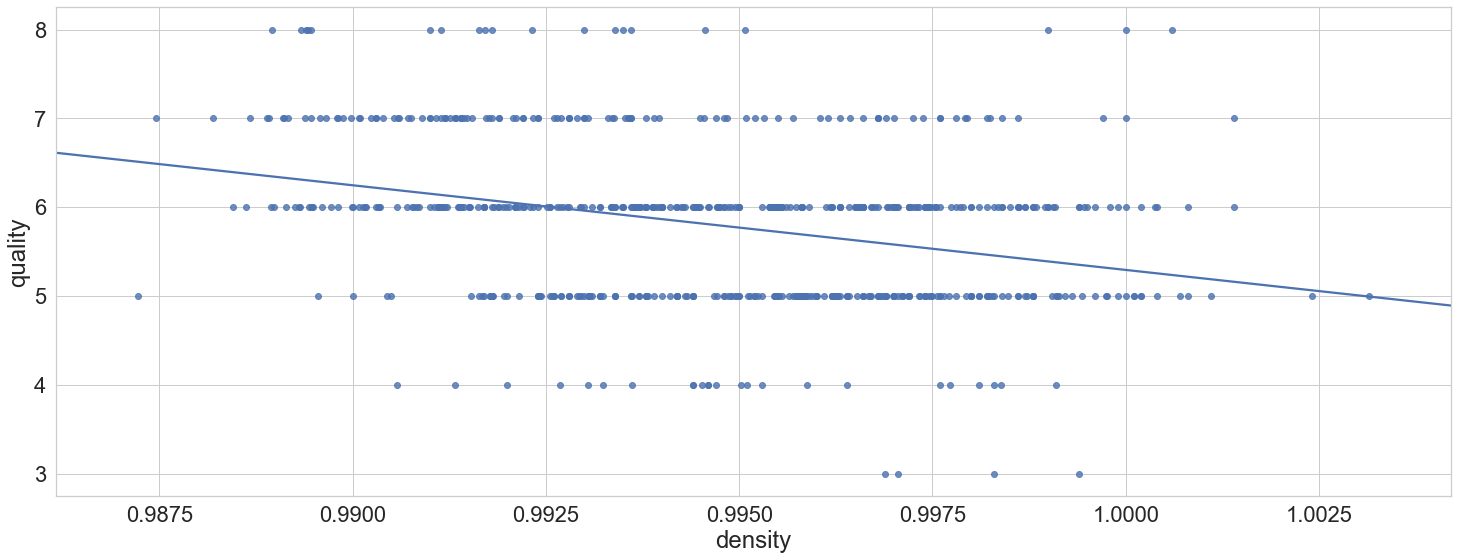

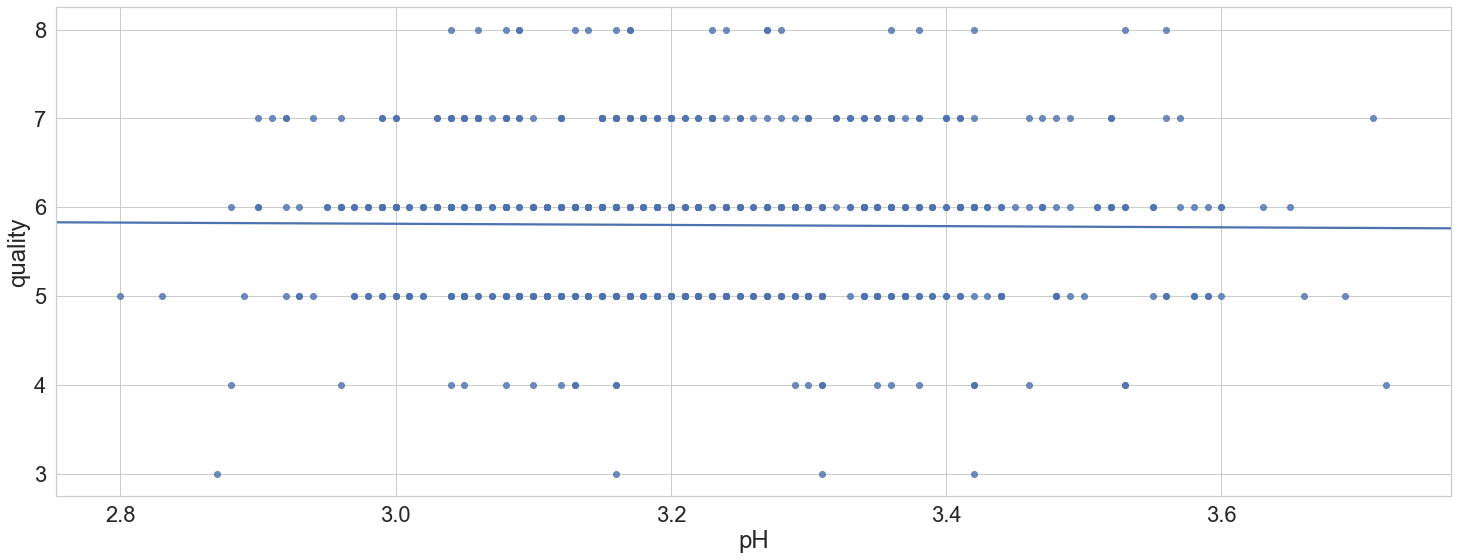

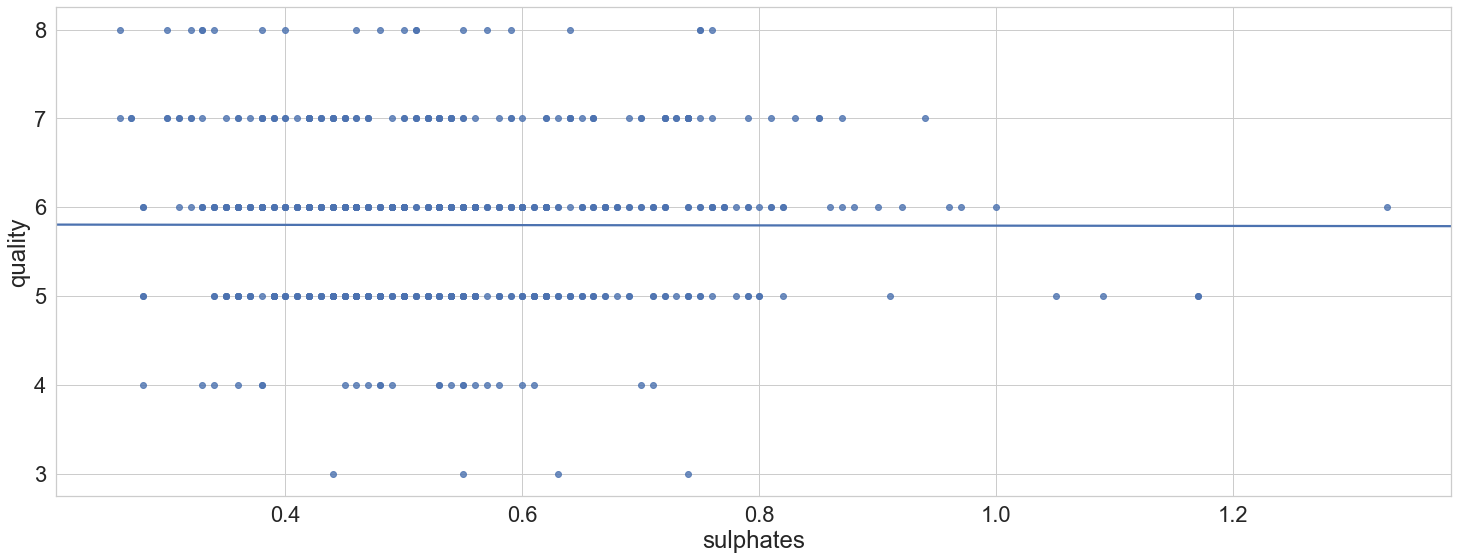

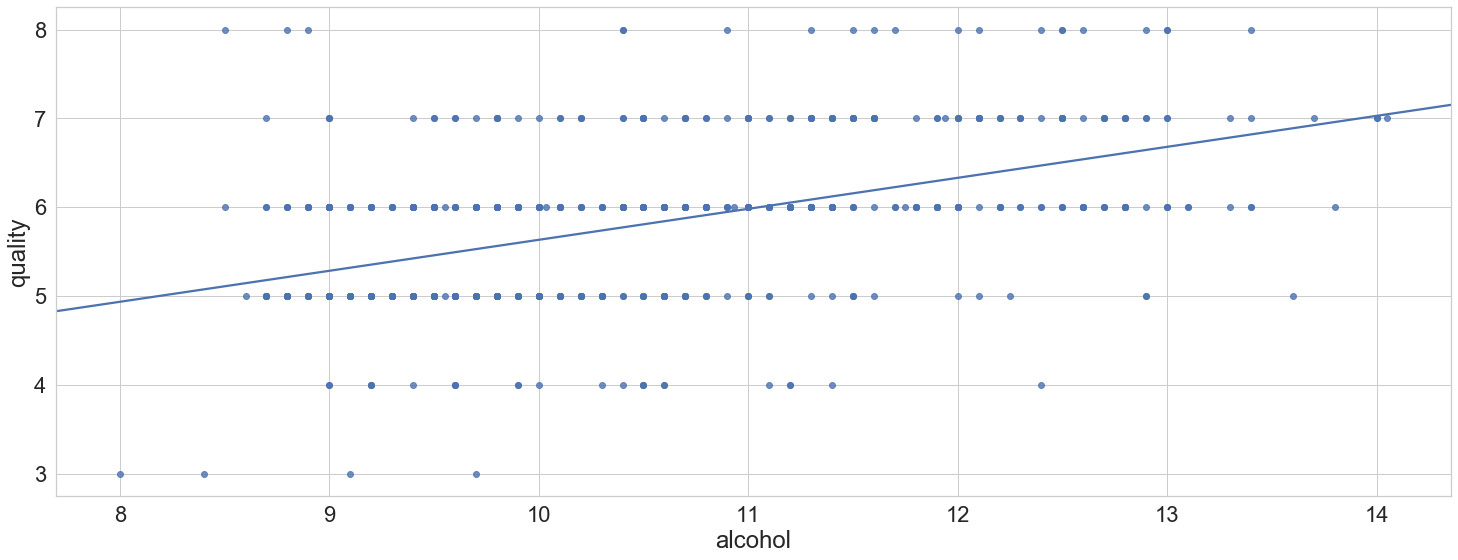

In [29]:
for col in reg_sample_df.columns:
    if col!='quality':
         plt.figure(figsize=(25, 9))
         sns.regplot(data=reg_sample_df, x=col, y='quality',ci=None,)

In [ ]:
scatterplot_sample_df = df.sample(frac=0.1, random_state=17)

In [ ]:
for feature in scatterplot_sample_df.columns :
     plt.figure(figsize=(16, 9))
     sns.scatterplot(data=scatterplot_sample_df, x=feature, y='quality', 
                     hue='quality', 
                     palette='cool', legend=False)

<Figure size 1152x648 with 0 Axes>

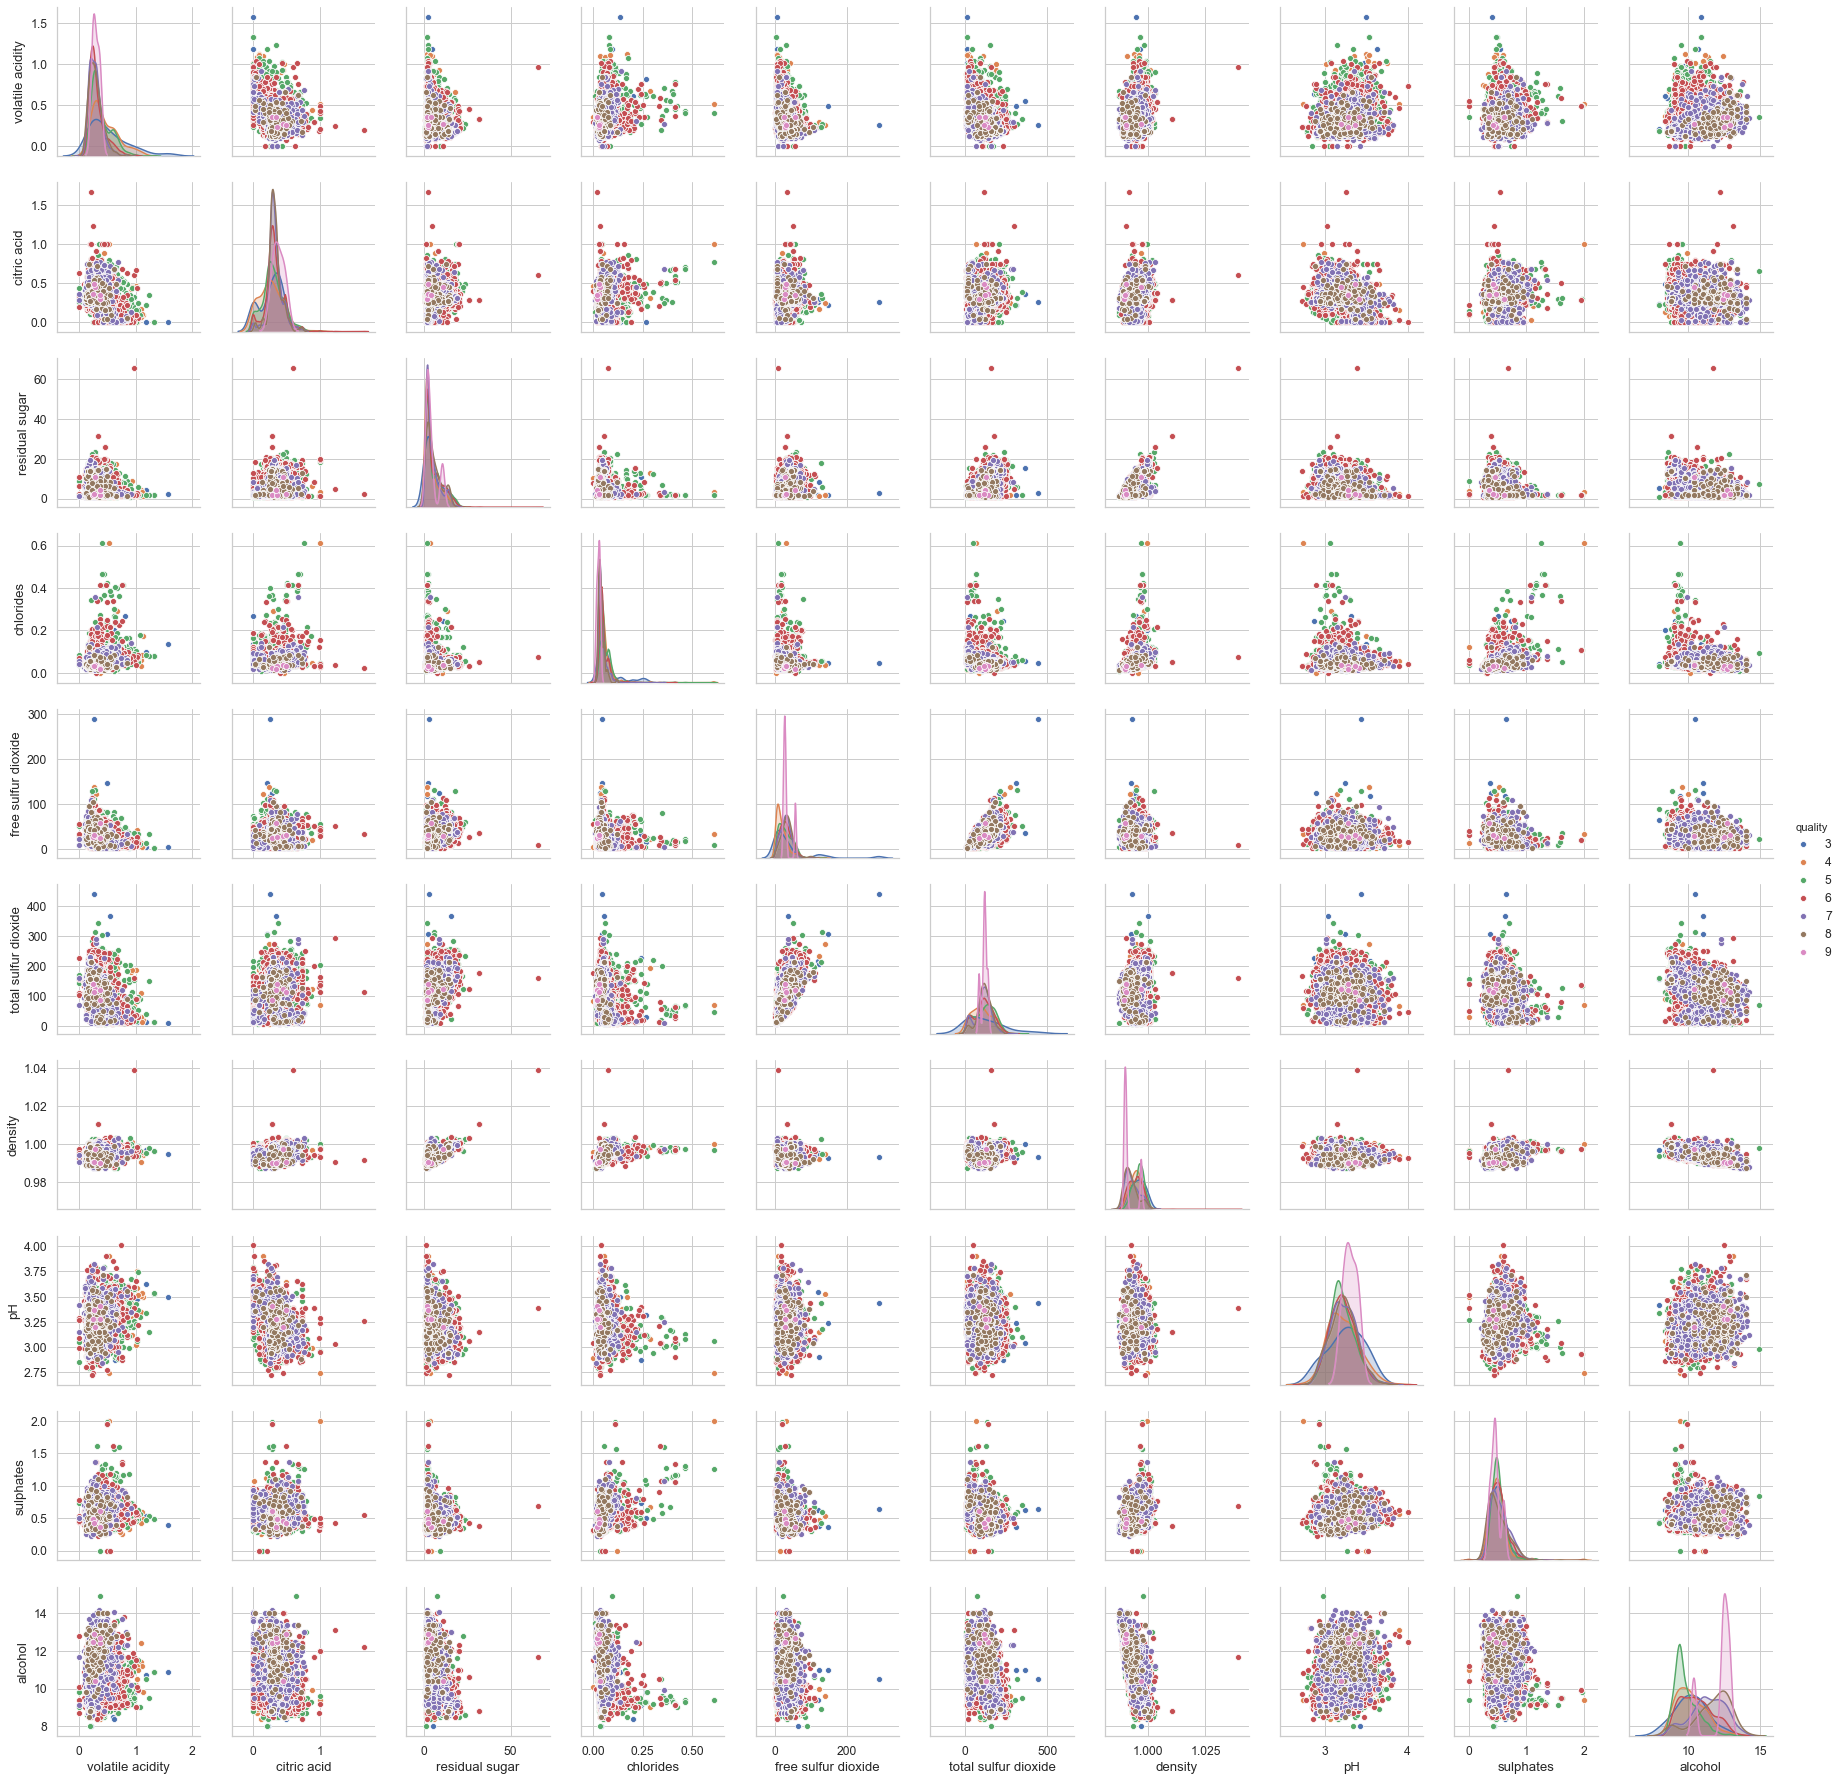

In [26]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 9))

sns.set(font_scale=1.1)
sns.set_style('whitegrid')

grid = sns.pairplot(data=df, vars=df.columns[1:11], hue='quality')

In [30]:
#data['Wheat Variety'] = data['Wheat Variety'].map({1.0:'Kama' , 2.0:'Rosa',3.0:'Canadian'})
df['quality'].describe() 

count    6497.0000
mean        5.8184
std         0.8733
min         3.0000
25%         5.0000
50%         6.0000
75%         6.0000
max         9.0000
Name: quality, dtype: float64

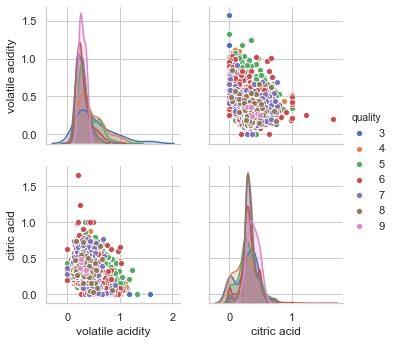

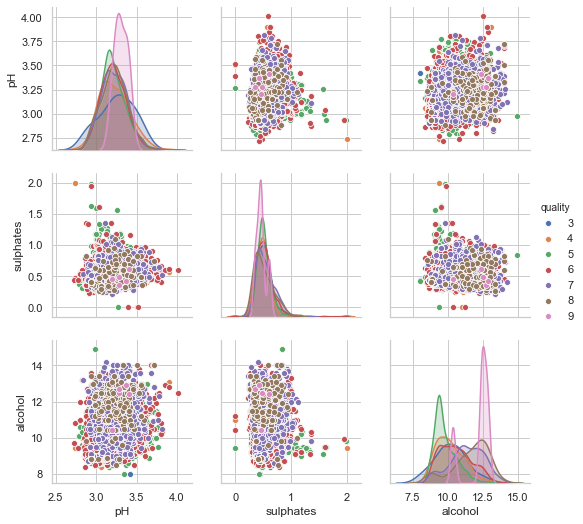

In [31]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#plt.figure(figsize=(100, 50))
from matplotlib import rcParams
rcParams['figure.figsize'] = 110.7,80.27
#sns.set(rc={'figure.figsize':(100,100)})
sns.set(font_scale=1)
sns.set_style('whitegrid')

grid0 = sns.pairplot(data=df, vars=df.columns[1:3], hue='quality') 

grid = sns.pairplot(data=df, vars=df.columns[8:11], hue='quality')

In [32]:
df.alcohol.values.reshape(-1, 1)

array([[ 8.8],
       [ 9.5],
       [10.1],
       ...,
       [11. ],
       [10.2],
       [11. ]])

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(df.alcohol.values.reshape(-1, 1), 
                     df.quality.values, 
                     random_state=11)

In [34]:
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

Shape of training set = (4872, 1)
Shape of testing  set = (1625, 1)


In [35]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f'regression coefficient (slope) = {linear_regression.coef_}')
print(f'                     intercept = {linear_regression.intercept_}')

regression coefficient (slope) = [0.32855964]
                     intercept = 2.369870461026491


In [39]:
predicted = linear_regression.predict(X_test)
expected  = y_test

for p, e in zip(predicted, expected):
    print(f'predicted: {p:.2f}, expected: {e:.2f}, difference: {p - e:.2f}')

predicted: 6.35, expected: 7.00, difference: -0.65
predicted: 5.49, expected: 5.00, difference: 0.49
predicted: 5.92, expected: 6.00, difference: -0.08
predicted: 5.59, expected: 6.00, difference: -0.41
predicted: 5.49, expected: 5.00, difference: 0.49
predicted: 5.85, expected: 7.00, difference: -1.15
predicted: 5.46, expected: 5.00, difference: 0.46
predicted: 5.36, expected: 5.00, difference: 0.36
predicted: 5.39, expected: 6.00, difference: -0.61
predicted: 5.49, expected: 5.00, difference: 0.49
predicted: 6.41, expected: 6.00, difference: 0.41
predicted: 6.15, expected: 6.00, difference: 0.15
predicted: 5.98, expected: 7.00, difference: -1.02
predicted: 6.44, expected: 6.00, difference: 0.44
predicted: 6.31, expected: 6.00, difference: 0.31
predicted: 6.21, expected: 5.00, difference: 1.21
predicted: 5.92, expected: 7.00, difference: -1.08
predicted: 5.59, expected: 5.00, difference: 0.59
predicted: 6.44, expected: 6.00, difference: 0.44
predicted: 5.85, expected: 6.00, difference

In [40]:
def predict_alcohol(linear_regression, variable):
    m = linear_regression.coef_
    b = linear_regression.intercept_
    x = variable
    
    y_hat = m*x + b
    
    return y_hat[0]

In [41]:
alcohol = 10.8
quality = predict_alcohol(linear_regression, alcohol)

print(f'The estimated quality of alcohol {alcohol} is {quality:.2f}')

The estimated quality of alcohol 10.8 is 5.92


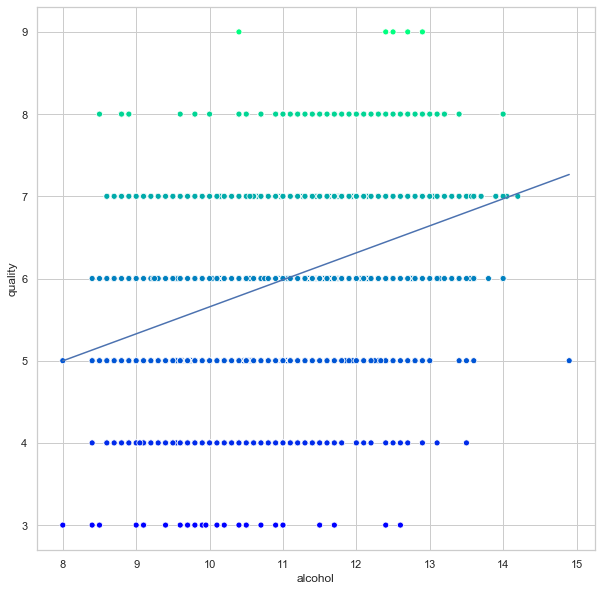

In [42]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style('whitegrid')
plt.figure(figsize=(10, 10))

sns.scatterplot(data=df, x='alcohol', y='quality',
                       hue='quality', palette='winter', legend=False)

x = np.array([min(df['alcohol']), max(df['alcohol'])])
y = x*linear_regression.coef_ + linear_regression.intercept_
line = plt.plot(x, y)

In [43]:
df2 = pd.read_csv('winequalityN.csv')
df2 = df2.fillna(0)

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


def predict(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X=X_train, y=y_train)
    print(f'Prediction accuracy score = {knn.score(X_test, y_test):.2%}')

In [45]:
X = df2.iloc[:, 1:11]
y = df2.iloc[:, 12]

X_train, X_test, y_train, y_test = \
    train_test_split(df.alcohol.values.reshape(-1, 1), 
                     df.quality.values, 
                     random_state=11)
print(f'Shape of training set = {X_train.shape}')
print(f'Shape of testing  set = {X_test.shape}')

linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

print(f'regression coefficient (slope) = {linear_regression.coef_}')
print(f'intercept = {linear_regression.intercept_}')

predict(X,y)

Shape of training set = (4872, 1)
Shape of testing  set = (1625, 1)
regression coefficient (slope) = [0.32855964]
intercept = 2.369870461026491
Prediction accuracy score = 43.77%


In [46]:
white = df2[df2.type == 'white']
red = df2[df2.type == 'red']

In [47]:
X = red.iloc[:, 1:11]
y = red.iloc[:, 12]
predict(X,y)

Prediction accuracy score = 48.75%


In [48]:
X = white.iloc[:, 1:11]
y = white.iloc[:, 12]
predict(X,y)

Prediction accuracy score = 43.37%
